# Laboratorio # 4
Cristina Bautista - 161260

Abril Palencia - 18198 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
df = pd.read_csv('VirusSample.csv')

In [3]:
df

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus
...,...,...,...
9790,3b91b43ad8a25a8e9e52f938473f5bb05fb4d530ff4b22...,"NtResetWriteWatch,GetClipboardViewer,GetConsol...",Trojan
9791,54315d591d2855fc794ba5f61012efdd92b489576e4aa5...,"RtlpNtEnumerateSubKey,NtFlushWriteBuffer,ReadC...",Trojan
9792,dcb7507fa10537d2e3da2ea22ec6346e02a0926ad64d76...,"ZwNotifyChangeDirectoryFile,GetCursor,GetConso...",Trojan
9793,cf441d0a2de25c6207fc782e190ce5302171d5e28ce41b...,"ILSaveToStream,OleQueryLinkFromData,VarUdateFr...",Trojan


In [4]:
df.file[0]

'7ff49f2f0912352416b05c010f35f402cc79feed'

In [5]:
df.api[0]

'IntersectRect,GetCurrentProcess,GetVersion'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9795 entries, 0 to 9794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    9795 non-null   object
 1   api     9795 non-null   object
 2   class   9795 non-null   object
dtypes: object(3)
memory usage: 229.7+ KB


In [7]:
np.unique(df[['class']])

array(['Adware', 'Agent', 'Backdoor', 'Crypt', 'Downloader', 'Dropper',
       'Keylogger', 'Ransomware', 'Riskware', 'Spyware', 'Trojan',
       'Virus', 'Worms'], dtype=object)

In [8]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

<AxesSubplot:>

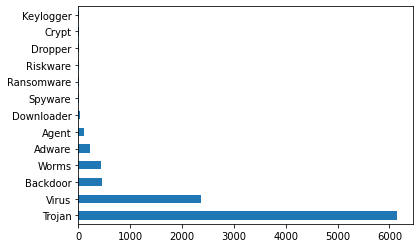

In [9]:
df['class'].value_counts().plot(kind='barh')

In [10]:
df['class'].replace({"Adware": 0, "Agent": 1, "Backdoor": 2, "Crypt": 3, "Downloader": 4, "Dropper": 5,
                    "Keylogger": 6, "Ransomware": 7, "Riskware": 8, "Spyware": 9, "Trojan": 10, "Virus": 11, 
                    "Worms": 12}, inplace=True)

In [11]:
df['class'].value_counts()

10    6153
11    2367
2      447
12     441
0      222
1      102
4       31
9       11
7       10
8        4
5        4
3        2
6        1
Name: class, dtype: int64

<AxesSubplot:>

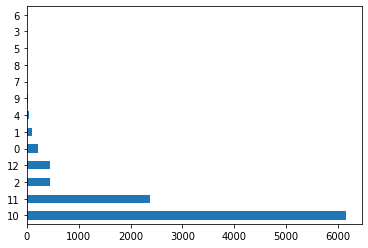

In [12]:
df['class'].value_counts().plot(kind='barh')

Eliminar las que tienen menos de 100 instancias, pueden crear ruido

In [13]:
# df.drop([8, 5, 3, 6], axis=3, inplace = True)
# eliminar = [8, 5, 3, 6]
df = df.drop(df.index[df['class'] == 4])
df = df.drop(df.index[df['class'] == 9])
df = df.drop(df.index[df['class'] == 7])
df = df.drop(df.index[df['class'] == 8])
df = df.drop(df.index[df['class'] == 5])
df = df.drop(df.index[df['class'] == 3])
df = df.drop(df.index[df['class'] == 6])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9732 entries, 0 to 9794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    9732 non-null   object
 1   api     9732 non-null   object
 2   class   9732 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 304.1+ KB


In [15]:
df['class'].value_counts()

10    6153
11    2367
2      447
12     441
0      222
1      102
Name: class, dtype: int64

<AxesSubplot:>

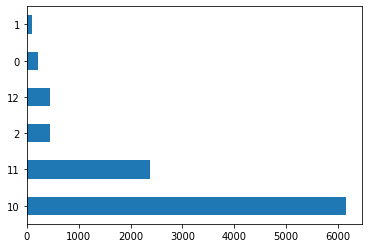

In [16]:
df['class'].value_counts().plot(kind='barh')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [18]:
df

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",4
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",4
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",4
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",4
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",4
...,...,...,...
9790,3b91b43ad8a25a8e9e52f938473f5bb05fb4d530ff4b22...,"NtResetWriteWatch,GetClipboardViewer,GetConsol...",3
9791,54315d591d2855fc794ba5f61012efdd92b489576e4aa5...,"RtlpNtEnumerateSubKey,NtFlushWriteBuffer,ReadC...",3
9792,dcb7507fa10537d2e3da2ea22ec6346e02a0926ad64d76...,"ZwNotifyChangeDirectoryFile,GetCursor,GetConso...",3
9793,cf441d0a2de25c6207fc782e190ce5302171d5e28ce41b...,"ILSaveToStream,OleQueryLinkFromData,VarUdateFr...",3


In [19]:
df.file = le.fit_transform(df.file)
df.api = le.fit_transform(df.api)

In [20]:
df

,file,api,class
0,4887,1240,4
1,3104,599,4
2,9414,2501,4
3,2027,2245,4
4,83,2127,4
...,...,...,...
9790,2242,1611,3
9791,3233,2059,3
9792,8390,2708,3
9793,7864,1209,3


In [21]:
target = df['class']
df_implement = df[['file', 'api']]

In [22]:
target

0       4
1       4
2       4
3       4
4       4
       ..
9790    3
9791    3
9792    3
9793    3
9794    3
Name: class, Length: 9732, dtype: int64

In [23]:
df_implement

,file,api
0,4887,1240
1,3104,599
2,9414,2501
3,2027,2245
4,83,2127
...,...,...
9790,2242,1611
9791,3233,2059
9792,8390,2708
9793,7864,1209


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
ss = MinMaxScaler()
ss.fit(df_implement)
df_implement = pd.DataFrame(ss.transform(df_implement))

In [26]:
df_implement

,0,1
0,0.502209,0.421912
1,0.318981,0.203811
2,0.967424,0.850970
3,0.208303,0.763865
4,0.008529,0.723716
...,...,...
9727,0.230398,0.548146
9728,0.332237,0.700578
9729,0.862193,0.921402
9730,0.808139,0.411364


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_implement, target, train_size=0.7, 
                                                    test_size=0.3, random_state=5)

In [29]:
x_train.shape, x_test.shape

((6812, 2), (2920, 2))

## Decision Tree Classifier 

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision = DecisionTreeClassifier()
decision = decision.fit(x_train, y_train)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
target_prediction = decision.predict(x_test)

In [38]:
accuracy_score(y_test, target_prediction)

0.8794520547945206

In [39]:
confusion_matrix(y_test, target_prediction)

array([[  52,    0,    0,   11,   14,    2],
       [   0,   11,    0,   17,    0,    0],
       [   0,    0,  104,   15,    0,    1],
       [  12,   25,    9, 1673,   69,   50],
       [  11,    3,    0,   69,  634,    7],
       [   1,    0,    1,   32,    3,   94]])

In [42]:
print(classification_report(y_test, target_prediction))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        79
           1       0.28      0.39      0.33        28
           2       0.91      0.87      0.89       120
           3       0.92      0.91      0.92      1838
           4       0.88      0.88      0.88       724
           5       0.61      0.72      0.66       131

    accuracy                           0.88      2920
   macro avg       0.72      0.74      0.72      2920
weighted avg       0.88      0.88      0.88      2920



## Naive Bayes 

In [45]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df_implement, target, train_size=0.7, 
                                                                    test_size=0.3, random_state=50)

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nb_bow = MultinomialNB()

In [48]:
nb_bow.fit(x_train_bow, y_train_bow)

MultinomialNB()

In [49]:
pred_bow = nb_bow.predict(x_test_bow)

In [50]:
accuracy_score(y_test_bow, pred_bow)

0.6270547945205479

In [51]:
confusion_matrix(y_test_bow, pred_bow)

array([[   0,    0,    0,   63,    0,    0],
       [   0,    0,    0,   38,    0,    0],
       [   0,    0,    0,  132,    0,    0],
       [   0,    0,    0, 1831,    0,    0],
       [   0,    0,    0,  718,    0,    0],
       [   0,    0,    0,  138,    0,    0]])

In [53]:
print(classification_report(y_test_bow, pred_bow))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00       132
           3       0.63      1.00      0.77      1831
           4       0.00      0.00      0.00       718
           5       0.00      0.00      0.00       138

    accuracy                           0.63      2920
   macro avg       0.10      0.17      0.13      2920
weighted avg       0.39      0.63      0.48      2920



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [57]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

print(cross_val_score(decision, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1))
print(cross_val_score(nb_bow, x_train_bow, y_train_bow, scoring='accuracy', cv=cv, n_jobs=-1))

[0.87683284 0.87683284 0.87812041 0.87518355 0.90161527 0.87518355
 0.86490455 0.88105727 0.88693098 0.8825257 ]
[0.61730205 0.6686217  0.64610866 0.66226138 0.64904552 0.61674009
 0.59030837 0.65051395 0.63142438 0.6123348 ]
